## Knapsack using qaoa from qiskit directly, from the portfolio optimization

In [2]:
from qiskit import Aer
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import RandomDataProvider
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
from qiskit import *
from qiskit_optimization import applications


In [4]:
r = applications.Knapsack([45,5,20,50],[50,20,3,60],74)

In [5]:
print(r.to_quadratic_program())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Knapsack

Maximize
 obj: 45 x_0 + 5 x_1 + 20 x_2 + 50 x_3
Subject To
 c0: 50 x_0 + 20 x_1 + 3 x_2 + 60 x_3 <= 74

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End



In [6]:
n = r.to_quadratic_program()

In [7]:
exact_mes = NumPyMinimumEigensolver()
exact_eigensolver = MinimumEigenOptimizer(exact_mes)

result = exact_eigensolver.solve(n)

print(result)

optimal function value: 70.0
optimal value: [1. 1. 1. 0.]
status: SUCCESS


In [8]:
from qiskit.utils import algorithm_globals
algorithm_globals.random_seed = 1234
backend = Aer.get_backend("statevector_simulator")

seed = 123

cobyla = COBYLA()
cobyla.set_options(maxiter=250)
quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)
qaoa_mes = QAOA(optimizer=cobyla, reps=5, quantum_instance=quantum_instance)# reps is the no. of repetitions = our parameter
qaoa = MinimumEigenOptimizer(qaoa_mes)
result = qaoa.solve(n)

print(result)

optimal function value: 70.0
optimal value: [1. 1. 1. 0.]
status: SUCCESS


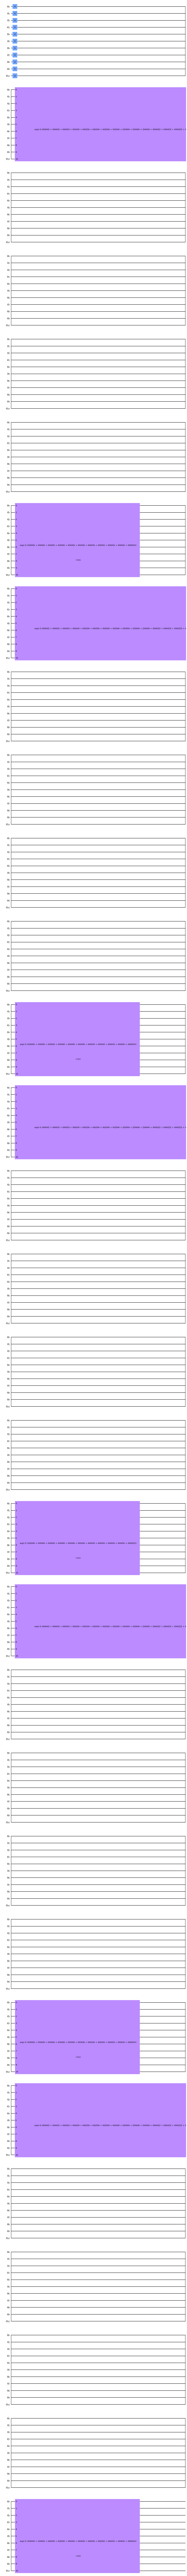

In [9]:
qaoa_mes.ansatz.draw(output = "mpl")

In [24]:
qaoa_mes.ansatz.depth()

11

In [1]:
from qiskit import transpile

In [10]:
backend.configuration().basis_gates

['ccx',
 'cp',
 'cswap',
 'csx',
 'cu',
 'cu1',
 'cu2',
 'cu3',
 'cx',
 'cy',
 'cz',
 'delay',
 'diagonal',
 'h',
 'id',
 'initialize',
 'mcp',
 'mcphase',
 'mcr',
 'mcrx',
 'mcry',
 'mcrz',
 'mcswap',
 'mcsx',
 'mcu',
 'mcu1',
 'mcu2',
 'mcu3',
 'mcx',
 'mcy',
 'mcz',
 'multiplexer',
 'p',
 'pauli',
 'r',
 'rx',
 'rxx',
 'ry',
 'ryy',
 'rz',
 'rzx',
 'rzz',
 's',
 'sdg',
 'swap',
 'sx',
 'sxdg',
 't',
 'tdg',
 'u',
 'u1',
 'u2',
 'u3',
 'unitary',
 'x',
 'y',
 'z',
 'kraus',
 'qerror_loc',
 'quantum_channel',
 'roerror',
 'save_amplitudes',
 'save_amplitudes_sq',
 'save_density_matrix',
 'save_expval',
 'save_probs',
 'save_probs_ket',
 'save_state',
 'save_statevector',
 'set_statevector']

In [11]:
import qiskit.test.mock as fake_backends
from qiskit.test.mock import FakeProvider

In [18]:
provider = FakeProvider()
backends =provider.backends()

for i in range(len(backends)):
    
    backend_details = backends[i]
    config_details = backend_details.configuration()
    
    if config_details.n_qubits >=11:
        if config_details.n_qubits <=30:
            print(backends[i],":",config_details.basis_gates)
            
        

fake_almaden : ['id', 'u1', 'u2', 'u3', 'cx']
fake_boeblingen : ['id', 'u1', 'u2', 'u3', 'cx']
fake_cairo : ['id', 'rz', 'sx', 'x', 'cx', 'reset']
fake_cambridge : ['id', 'u1', 'u2', 'u3', 'cx']
fake_cambridge : ['u', 'sx', 'p', 'cx', 'id']
fake_guadalupe : ['id', 'rz', 'sx', 'x', 'cx', 'reset']
fake_hanoi : ['id', 'rz', 'sx', 'x', 'cx', 'reset']
fake_johannesburg : ['id', 'u1', 'u2', 'u3', 'cx']
fake_kolkata : ['id', 'rz', 'sx', 'x', 'cx', 'reset']
fake_melbourne : ['u1', 'u2', 'u3', 'cx', 'id']
fake_montreal : ['id', 'rz', 'sx', 'x', 'cx', 'reset']
fake_mumbai : ['id', 'rz', 'sx', 'x', 'cx', 'reset']
fake_paris : ['id', 'rz', 'sx', 'x', 'cx', 'reset']
fake_poughkeepsie : ['u1', 'u2', 'u3', 'cx', 'id']
fake_rueschlikon : ['u1', 'u2', 'u3', 'cx', 'id']
fake_singapore : ['id', 'u1', 'u2', 'u3', 'cx']
fake_sydney : ['id', 'rz', 'sx', 'x', 'cx', 'reset']
fake_tokyo : ['u1', 'u2', 'u3', 'cx', 'id']
fake_toronto : ['id', 'rz', 'sx', 'x', 'cx', 'reset']


In [19]:
from qiskit.test.mock import FakeGuadalupe
device_backend = FakeGuadalupe()

In [20]:
config_details = device_backend.configuration()
config_details.basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

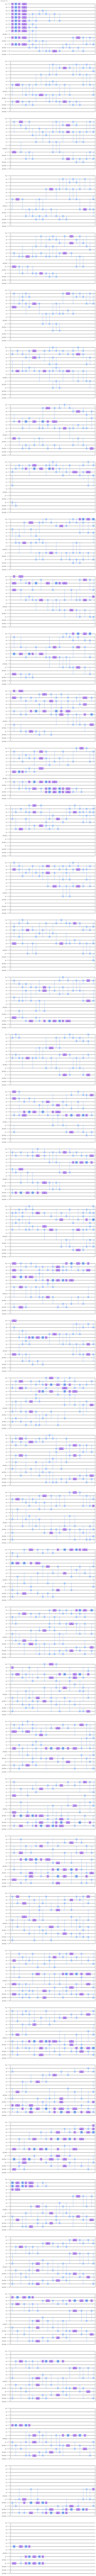

In [21]:
qc_basis = transpile(qaoa_mes.ansatz, device_backend)
qc_basis.draw(output='mpl')

In [23]:
qc_basis.depth()

664

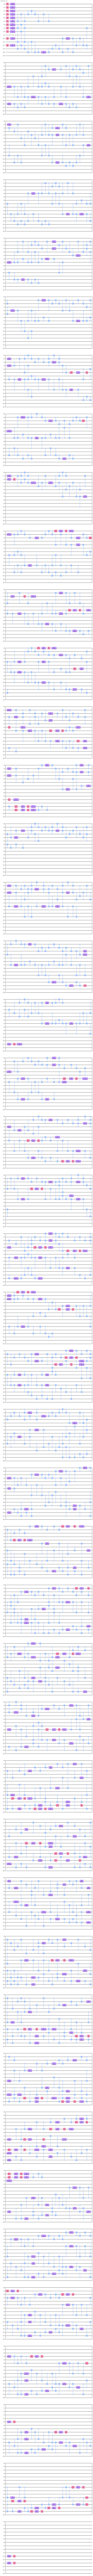

In [27]:
from qiskit.visualization import plot_circuit_layout
new_circ_lv3 = transpile(qc_basis, backend=backend, optimization_level=3)
new_circ_lv3.draw("mpl")

In [28]:
new_circ_lv3.depth()

643